In [9]:
#USE AS TEMPLATE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# from torch.nn.parallel import DataParallel

# # Step 1: Prepare the Dataset
# data_transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize images to the desired size
#     transforms.ToTensor(),  # Convert images to tensors
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image tensors
# ])

# dataset = ImageFolder(root='path_to_dataset', transform=data_transform)
# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [800, 100, 100])

# # Step 2: Image Classification with ViT
# class ViTModel(nn.Module):
#     # Define ViT model architecture

# # Step 3: Description Generation with GiT
# class GiTModel(nn.Module):
#     # Define GiT model architecture

# # Step 4: Parallelize ViT and GiT Models
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initialize ViT model
# viT_model = ViTModel(num_classes=10).to(device)
# viT_model = nn.DataParallel(viT_model)

# # Initialize GiT model
# giT_model = GiTModel(num_classes=100).to(device)
# giT_model = nn.DataParallel(giT_model)

# # Step 5: Define Optimizers and Loss Functions
# viT_optimizer = optim.Adam(viT_model.parameters(), lr=0.001)
# giT_optimizer = optim.Adam(giT_model.parameters(), lr=0.001)
# viT_criterion = nn.CrossEntropyLoss()
# giT_criterion = nn.CrossEntropyLoss()

# # Step 6: Prepare Dataloaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16)
# test_loader = DataLoader(test_dataset, batch_size=16)

# # Step 7: Training Loop
# num_epochs = 10

# for epoch in range(num_epochs):
#     # Training loop for ViT
#     viT_model.train()
#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         viT_optimizer.zero_grad()
#         author_predictions, style_predictions = viT_model(images)
#         author_loss = viT_criterion(author_predictions, labels[:, 0])
#         style_loss = viT_criterion(style_predictions, labels[:, 1])
#         viT_loss = author_loss + style_loss
#         viT_loss.backward()
#         viT_optimizer.step()

#     # Training loop for GiT
#     giT_model.train()
#     for descriptions, labels in train_loader:
#         descriptions = descriptions.to(device)
#         labels = labels.to(device)

#         giT_optimizer.zero_grad()
#         description_predictions = giT_model(descriptions)
#         description_loss = giT_criterion(description_predictions, labels[:, 2])
#         description_loss.backward()
#         giT_optimizer.step()

#     # Evaluation on validation set
#     viT_model.eval()
#     giT_model.eval()
#     with torch.no_grad():
#         total_correct_viT = 0
#         total_correct_giT = 0
#         total_samples = 0

#         for images, descriptions, labels in val_loader:
#             images = images.to(device)
#             descriptions = descriptions.to(device)
#             labels = labels.to(device)

#             author_predictions, style_predictions = viT_model(images)
#             _, author_predicted = torch.max(author_predictions, 1)
#             _, style_predicted = torch.max(style_predictions, 1)
#             total_correct_viT += (author_predicted == labels[:, 0]).sum().item() + (style_predicted == labels[:, 1]).sum().item()

#             description_predictions = giT_model(descriptions)
#             _, description_predicted = torch.max(description_predictions, 1)
#             total_correct_giT += (description_predicted == labels[:, 2]).sum().item()

#             total_samples += labels.size(0)

#         accuracy_viT = total_correct_viT / total_samples
#         accuracy_giT = total_correct_giT / total_samples
#         print(f"Epoch {epoch+1}: ViT Accuracy - {accuracy_viT}, GiT Accuracy - {accuracy_giT}")

# # Step 8: Inference and Prediction
# viT_model.eval()
# giT_model.eval()
# with torch.no_grad():
#     for images, descriptions, labels in test_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)

#         author_predictions, style_predictions = viT_model(images)
#         description_predictions = giT_model(descriptions)

#         # Perform appropriate aggregation of predictions
#         final_predictions = ...  # Combine the predictions from ViT and GiT

#         # Make use of the final_predictions for your desired task


# # Training loop for GiT
# for epoch in range(num_epochs):
#     viT_model.train()
#     giT_model.train()
#     for images, descriptions, labels in train_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)
#         labels = labels.to(device)

#         viT_optimizer.zero_grad()
#         giT_optimizer.zero_grad()

#         # Forward pass through ViT
#         author_predictions, style_predictions = viT_model(images)
#         author_loss = viT_criterion(author_predictions, labels[:, 0])
#         style_loss = viT_criterion(style_predictions, labels[:, 1])

#         # Forward pass through GiT
#         description_predictions = giT_model(images, descriptions)
#         description_loss = giT_criterion(description_predictions, labels[:, 2])

#         # Compute total loss
#         total_loss = author_loss + style_loss + description_loss

#         # Backpropagation and optimization
#         total_loss.backward()
#         viT_optimizer.step()
#         giT_optimizer.step()

#     # Evaluation on validation set
#     viT_model.eval()
#     giT_model.eval()
#     with torch.no_grad():
#         total_correct_viT = 0
#         total_correct_giT = 0
#         total_samples = 0

#         for images, descriptions, labels in val_loader:
#             images = images.to(device)
#             descriptions = descriptions.to(device)
#             labels = labels.to(device)

#             # ViT predictions
#             author_predictions, style_predictions = viT_model(images)
#             _, author_predicted = torch.max(author_predictions, 1)
#             _, style_predicted = torch.max(style_predictions, 1)
#             total_correct_viT += (author_predicted == labels[:, 0]).sum().item() + (style_predicted == labels[:, 1]).sum().item()

#             # GiT predictions
#             description_predictions = giT_model(images, descriptions)
#             _, description_predicted = torch.max(description_predictions, 1)
#             total_correct_giT += (description_predicted == labels[:, 2]).sum().item()

#             total_samples += labels.size(0)

#         accuracy_viT = total_correct_viT / total_samples
#         accuracy_giT = total_correct_giT / total_samples
#         print(f"Epoch {epoch+1}: ViT Accuracy - {accuracy_viT}, GiT Accuracy - {accuracy_giT}")

# # Inference and Prediction
# viT_model.eval()
# giT_model.eval()
# with torch.no_grad():
#     for images, descriptions, labels in test_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)

#         # ViT predictions
#         author_predictions, style_predictions = viT_model(images)
#         _, author_predicted = torch.max(author_predictions, 1)
#         _, style_predicted = torch.max(style_predictions, 1)

#         # GiT predictions
#         description_predictions = giT_model(images, descriptions)
#         _, description_predicted = torch.max(description_predictions, 1)

#         # Perform appropriate aggregation of predictions
#         final_predictions = ...  # Combine the predictions from ViT and GiT

#         # Make use of the final_predictions for your desired task


In [10]:
import pandas as pd
import datasets
from PIL import Image
import torch
import torch.nn as nn

In [11]:
train_data = pd.read_csv('./toy_dataset_label.csv',sep='\t',encoding='latin-1')
print(f'coumns:{[x for x in train_data.columns]}')

coumns:['ID', 'FILE', 'AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'URL']


In [12]:
train_data.describe()

,ID
count,43455.000000
mean,21728.000000
std,12544.522311
min,1.000000
25%,10864.500000
50%,21728.000000
75%,32591.500000
max,43455.000000


In [13]:
train_data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [14]:
import requests
from bs4 import BeautifulSoup,Comment
import numpy as np

def get_description(url):    
    r = requests.get(url)
    html_content = r.text

    soup = BeautifulSoup(html_content,'html.parser')

    comment = soup.find(string=lambda text: isinstance(text,Comment))
    if not comment:
        print('culo')
        return 0
    
    parent_element = comment.find_parent()
    p_tag=parent_element.find('p')
    text_content = ''.join(p_tag.stripped_strings)
    return text_content

In [15]:
features = ['FILE','AUTHOR','URL']
train_data = train_data[features]
train_data = train_data[:500]
# train_data['TECHNIQUE'] = train_data['TECHNIQUE'].str.split(',').str[0]
# train_data['TECHNIQUE'] = train_data['TECHNIQUE'].str.split(':').str[0]
train_data.head()

,FILE,AUTHOR,URL
0,1.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/allegory.html
1,2.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/bacchus.html
2,3.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/j_couple.html
3,4.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/rudolf2.html
4,5.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/selfport.html


In [16]:
from tqdm import tqdm

with tqdm(total=len(train_data)) as pbar:
    for idx in range(train_data.shape[0]):
        pbar.set_description(f'Art Piece N°: {idx}')
        train_data['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
        train_data['URL'][idx] = get_description(train_data['URL'][idx])
        pbar.update()

Art Piece N°: 128:  26%|██▌       | 128/500 [01:27<04:13,  1.47it/s]

culo


Art Piece N°: 129:  26%|██▌       | 129/500 [01:28<04:15,  1.45it/s]

culo


Art Piece N°: 130:  26%|██▌       | 130/500 [01:29<04:13,  1.46it/s]

culo


Art Piece N°: 131:  26%|██▌       | 131/500 [01:29<04:15,  1.45it/s]

culo


Art Piece N°: 132:  26%|██▋       | 132/500 [01:30<04:14,  1.45it/s]

culo


Art Piece N°: 133:  27%|██▋       | 133/500 [01:31<04:14,  1.44it/s]

culo


Art Piece N°: 134:  27%|██▋       | 134/500 [01:31<04:13,  1.44it/s]

culo


Art Piece N°: 135:  27%|██▋       | 135/500 [01:32<04:11,  1.45it/s]

culo


Art Piece N°: 136:  27%|██▋       | 136/500 [01:33<04:11,  1.45it/s]

culo


Art Piece N°: 137:  27%|██▋       | 137/500 [01:33<04:12,  1.44it/s]

culo


Art Piece N°: 138:  28%|██▊       | 138/500 [01:34<04:11,  1.44it/s]

culo


Art Piece N°: 139:  28%|██▊       | 139/500 [01:35<04:09,  1.45it/s]

culo


Art Piece N°: 140:  28%|██▊       | 140/500 [01:35<04:09,  1.45it/s]

culo


Art Piece N°: 141:  28%|██▊       | 141/500 [01:36<04:08,  1.45it/s]

culo


Art Piece N°: 142:  28%|██▊       | 142/500 [01:37<04:07,  1.45it/s]

culo


Art Piece N°: 143:  29%|██▊       | 143/500 [01:38<04:05,  1.45it/s]

culo


Art Piece N°: 144:  29%|██▉       | 144/500 [01:38<04:04,  1.45it/s]

culo


Art Piece N°: 145:  29%|██▉       | 145/500 [01:39<04:03,  1.46it/s]

culo


Art Piece N°: 146:  29%|██▉       | 146/500 [01:40<04:04,  1.45it/s]

culo


Art Piece N°: 147:  29%|██▉       | 147/500 [01:40<04:05,  1.44it/s]

culo


Art Piece N°: 242:  48%|████▊     | 242/500 [02:45<02:54,  1.48it/s]

culo


Art Piece N°: 251:  50%|█████     | 251/500 [02:51<02:49,  1.47it/s]

culo


Art Piece N°: 253:  51%|█████     | 253/500 [02:52<02:50,  1.45it/s]

culo


Art Piece N°: 254:  51%|█████     | 254/500 [02:53<02:50,  1.45it/s]

culo


Art Piece N°: 256:  51%|█████     | 256/500 [02:55<02:48,  1.45it/s]

culo


Art Piece N°: 257:  51%|█████▏    | 257/500 [02:55<02:48,  1.44it/s]

culo


Art Piece N°: 258:  52%|█████▏    | 258/500 [02:56<02:48,  1.43it/s]

culo


Art Piece N°: 259:  52%|█████▏    | 259/500 [02:57<02:47,  1.43it/s]

culo


Art Piece N°: 260:  52%|█████▏    | 260/500 [02:57<02:46,  1.45it/s]

culo


Art Piece N°: 261:  52%|█████▏    | 261/500 [02:58<02:45,  1.45it/s]

culo


Art Piece N°: 263:  53%|█████▎    | 263/500 [02:59<02:42,  1.46it/s]

culo


Art Piece N°: 264:  53%|█████▎    | 264/500 [03:00<02:42,  1.45it/s]

culo


Art Piece N°: 266:  53%|█████▎    | 266/500 [03:01<02:40,  1.46it/s]

culo


Art Piece N°: 267:  53%|█████▎    | 267/500 [03:02<02:40,  1.46it/s]

culo


Art Piece N°: 268:  54%|█████▎    | 268/500 [03:03<02:39,  1.46it/s]

culo


Art Piece N°: 269:  54%|█████▍    | 269/500 [03:03<02:39,  1.45it/s]

culo


Art Piece N°: 270:  54%|█████▍    | 270/500 [03:04<02:38,  1.45it/s]

culo


Art Piece N°: 271:  54%|█████▍    | 271/500 [03:05<02:38,  1.45it/s]

culo


Art Piece N°: 272:  54%|█████▍    | 272/500 [03:06<02:38,  1.44it/s]

culo


Art Piece N°: 273:  55%|█████▍    | 273/500 [03:06<02:37,  1.45it/s]

culo


Art Piece N°: 274:  55%|█████▍    | 274/500 [03:07<02:35,  1.45it/s]

culo


Art Piece N°: 275:  55%|█████▌    | 275/500 [03:08<02:35,  1.45it/s]

culo


Art Piece N°: 403:  81%|████████  | 403/500 [04:35<01:05,  1.48it/s]

culo


Art Piece N°: 404:  81%|████████  | 404/500 [04:35<01:05,  1.48it/s]

culo


Art Piece N°: 405:  81%|████████  | 405/500 [04:36<01:04,  1.47it/s]

culo


Art Piece N°: 406:  81%|████████  | 406/500 [04:37<01:04,  1.45it/s]

culo


Art Piece N°: 447:  89%|████████▉ | 447/500 [05:06<00:36,  1.45it/s]

culo


Art Piece N°: 448:  90%|████████▉ | 448/500 [05:06<00:35,  1.45it/s]

culo


Art Piece N°: 449:  90%|████████▉ | 449/500 [05:07<00:35,  1.45it/s]

culo


Art Piece N°: 450:  90%|█████████ | 450/500 [05:08<00:34,  1.45it/s]

culo


Art Piece N°: 451:  90%|█████████ | 451/500 [05:08<00:33,  1.45it/s]

culo


Art Piece N°: 452:  90%|█████████ | 452/500 [05:09<00:33,  1.44it/s]

culo


Art Piece N°: 453:  91%|█████████ | 453/500 [05:10<00:32,  1.45it/s]

culo


Art Piece N°: 454:  91%|█████████ | 454/500 [05:10<00:32,  1.42it/s]

culo


Art Piece N°: 455:  91%|█████████ | 455/500 [05:11<00:31,  1.43it/s]

culo


Art Piece N°: 456:  91%|█████████ | 456/500 [05:12<00:30,  1.43it/s]

culo


Art Piece N°: 457:  91%|█████████▏| 457/500 [05:12<00:29,  1.44it/s]

culo


Art Piece N°: 458:  92%|█████████▏| 458/500 [05:13<00:29,  1.44it/s]

culo


Art Piece N°: 459:  92%|█████████▏| 459/500 [05:14<00:28,  1.44it/s]

culo


Art Piece N°: 460:  92%|█████████▏| 460/500 [05:15<00:28,  1.43it/s]

culo


Art Piece N°: 461:  92%|█████████▏| 461/500 [05:15<00:27,  1.43it/s]

culo


Art Piece N°: 462:  92%|█████████▏| 462/500 [05:16<00:26,  1.42it/s]

culo


Art Piece N°: 463:  93%|█████████▎| 463/500 [05:17<00:25,  1.43it/s]

culo


Art Piece N°: 464:  93%|█████████▎| 464/500 [05:17<00:24,  1.44it/s]

culo


Art Piece N°: 465:  93%|█████████▎| 465/500 [05:18<00:24,  1.45it/s]

culo


Art Piece N°: 466:  93%|█████████▎| 466/500 [05:19<00:23,  1.45it/s]

culo


Art Piece N°: 467:  93%|█████████▎| 467/500 [05:19<00:22,  1.44it/s]

culo


Art Piece N°: 468:  94%|█████████▎| 468/500 [05:20<00:22,  1.44it/s]

culo


Art Piece N°: 469:  94%|█████████▍| 469/500 [05:21<00:21,  1.44it/s]

culo


Art Piece N°: 470:  94%|█████████▍| 470/500 [05:22<00:20,  1.45it/s]

culo


Art Piece N°: 471:  94%|█████████▍| 471/500 [05:22<00:20,  1.44it/s]

culo


Art Piece N°: 472:  94%|█████████▍| 472/500 [05:23<00:19,  1.44it/s]

culo


Art Piece N°: 473:  95%|█████████▍| 473/500 [05:24<00:18,  1.43it/s]

culo


Art Piece N°: 474:  95%|█████████▍| 474/500 [05:24<00:18,  1.44it/s]

culo


Art Piece N°: 476:  95%|█████████▌| 476/500 [05:26<00:16,  1.44it/s]

culo


Art Piece N°: 477:  95%|█████████▌| 477/500 [05:26<00:15,  1.44it/s]

culo


Art Piece N°: 499: 100%|██████████| 500/500 [05:42<00:00,  1.46it/s]


In [17]:
train_data.dropna()
train_data = train_data[train_data['URL'] != 0]

In [18]:
train_data = train_data.rename(columns={'FILE':'image','AUTHOR':'label','URL':'description'})

In [20]:
labels_cat = train_data['label'].unique()
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_cat):
    label2id[label]=i
    id2label[i]=label

In [23]:
train_data['label'] = train_data['label'].map(label2id)
train_data.columns

Index(['image', 'label', 'description'], dtype='object')

In [24]:
train_data_capt = train_data[['image','description']]
train_data_clas = train_data[['image','label']]

In [25]:
train_dataset_capt = datasets.Dataset.from_dict(train_data_capt).cast_column('image',datasets.Image())
train_dataset_clas = datasets.Dataset.from_dict(train_data_clas).cast_column('image',datasets.Image())
print(train_dataset_capt)
print(train_dataset_clas)

Dataset({
    features: ['image', 'description'],
    num_rows: 424
})
Dataset({
    features: ['image', 'label'],
    num_rows: 424
})


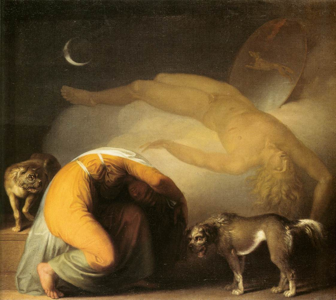

Author: 8


In [27]:
sample = train_dataset_clas[26]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
# caption = sample['description']
author = sample['label']
# technique = sample['technique']
# print(f'Description: {caption}')
print(f'Author: {author}')
# print(f'Technique: {technique}')

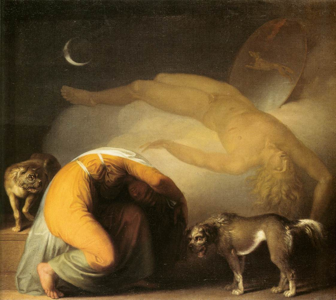

Description: The subject is taken from the Songs of Ossian.


In [28]:
sample = train_dataset_capt[26]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['description']
# author = sample['author']
# technique = sample['technique']
print(f'Description: {caption}')
# print(f'Author: {author}')
# print(f'Technique: {technique}')

In [29]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["description"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [30]:
from transformers import AutoProcessor

processor_clas = AutoProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
processor_capt = AutoProcessor.from_pretrained("microsoft/git-base")

In [31]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=processor_clas.image_mean, std=processor_clas.image_std)

size = (

    processor_clas.size["shortest_edge"]

    if "shortest_edge" in processor_clas.size

    else (processor_clas.size["height"], processor_clas.size["width"])

)

_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [32]:
def transforms(examples):
    examples['pixel_values'] = [_transforms(img.convert('RGB'))for img in examples['image']]
    del examples['image']
    return examples

In [33]:
train_clas = train_dataset_clas.with_transform(transforms)
print(train_clas)

Dataset({
    features: ['image', 'label'],
    num_rows: 424
})


In [34]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

checkpoint= 'google/vit-base-patch16-224-in21k'

model_clas = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels = len(labels_cat),
    id2label = id2label,
    label2id = label2id
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
train_d = ImageCaptioningDataset(train_dataset_capt,processor_capt)

In [36]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_d,shuffle=True,batch_size=2)

In [37]:
from transformers import AutoModelForCausalLM

model_capt = AutoModelForCausalLM.from_pretrained('microsoft/git-base')

In [38]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [39]:
outputs = model_capt(input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                pixel_values=batch['pixel_values'],
                labels=batch['input_ids'])

outputs.loss

tensor(12.3243, grad_fn=<NllLossBackward0>)

In [40]:
from transformers import DefaultDataCollator

data_collator=DefaultDataCollator()

In [41]:
#Category train

training_args = TrainingArguments(
    output_dir='_model',
    remove_unused_columns=False,
    #evaluation_strategy = 'epoch',
    #save_strategy = 'epoch',
    learning_rate=5e-5,
    per_device_train_batch_size = 2,
    gradient_accumulation_steps=4,
    num_train_epochs=50,
    warmup_ratio=0.1,
    logging_steps=10,
    #load_best_model_at_end = True,
    #metric_for_best_model = 'accuracy'
)

trainer = Trainer(
    model = model_clas,
    args = training_args,
    data_collator = data_collator,
    train_dataset=train_clas,
    tokenizer = processor_clas,
)

trainer.train()

d:\envs\tf\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rullofederico16 (fede-). Use `wandb login --relogin` to force relogin


  0%|          | 0/2650 [00:00<?, ?it/s]

{'loss': 4.3943, 'learning_rate': 1.8867924528301887e-06, 'epoch': 0.19}
{'loss': 4.3863, 'learning_rate': 3.7735849056603773e-06, 'epoch': 0.38}
{'loss': 4.3824, 'learning_rate': 5.660377358490566e-06, 'epoch': 0.57}
{'loss': 4.3695, 'learning_rate': 7.547169811320755e-06, 'epoch': 0.75}
{'loss': 4.372, 'learning_rate': 9.433962264150944e-06, 'epoch': 0.94}
{'loss': 4.347, 'learning_rate': 1.1320754716981132e-05, 'epoch': 1.13}
{'loss': 4.3082, 'learning_rate': 1.320754716981132e-05, 'epoch': 1.32}
{'loss': 4.3006, 'learning_rate': 1.509433962264151e-05, 'epoch': 1.51}
{'loss': 4.2782, 'learning_rate': 1.69811320754717e-05, 'epoch': 1.7}
{'loss': 4.2674, 'learning_rate': 1.8867924528301888e-05, 'epoch': 1.89}
{'loss': 4.2308, 'learning_rate': 2.0754716981132076e-05, 'epoch': 2.08}
{'loss': 4.1288, 'learning_rate': 2.2641509433962265e-05, 'epoch': 2.26}
{'loss': 4.1132, 'learning_rate': 2.4528301886792453e-05, 'epoch': 2.45}
{'loss': 4.061, 'learning_rate': 2.641509433962264e-05, 'epoc

TrainOutput(global_step=2650, training_loss=1.2020560268186173, metrics={'train_runtime': 1355.2517, 'train_samples_per_second': 15.643, 'train_steps_per_second': 1.955, 'train_loss': 1.2020560268186173, 'epoch': 50.0})

In [43]:
#Captioning Training

import torch

optimizer = torch.optim.AdamW(model_capt.parameters(),lr=5e-5)

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
model_capt.to(device)

model_capt.train()

for epoch in range(2):
    print('Epoch:',epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop('input_ids').to(device)
        pixel_values=batch.pop('pixel_values').to(device)

        outputs = model_capt(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels = input_ids)
        loss = outputs.loss

        print('Loss: ', loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

Epoch: 0
Loss:  11.234344482421875
Loss:  10.343572616577148
Loss:  9.86019229888916
Loss:  9.269497871398926
Loss:  9.583911895751953
Loss:  9.615028381347656
Loss:  9.130487442016602
Loss:  8.983494758605957
Loss:  8.845878601074219
Loss:  8.11648178100586
Loss:  8.73570442199707
Loss:  8.762495994567871
Loss:  8.621697425842285
Loss:  8.512025833129883
Loss:  8.277477264404297
Loss:  8.05709457397461
Loss:  8.089795112609863
Loss:  7.921846389770508
Loss:  7.752258777618408
Loss:  7.427659511566162
Loss:  7.5618438720703125
Loss:  7.491771697998047
Loss:  7.561694145202637
Loss:  7.404999732971191
Loss:  7.278596878051758
Loss:  7.269870758056641
Loss:  6.959286689758301
Loss:  6.961213111877441
Loss:  6.958878517150879
Loss:  6.794780254364014
Loss:  6.63744592666626
Loss:  6.592935562133789
Loss:  6.52105188369751
Loss:  6.532297611236572
Loss:  6.386023044586182
Loss:  6.2641801834106445
Loss:  6.137510299682617
Loss:  6.0572614669799805
Loss:  6.1218671798706055
Loss:  5.7327861

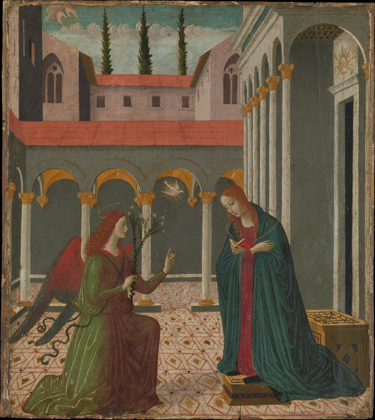

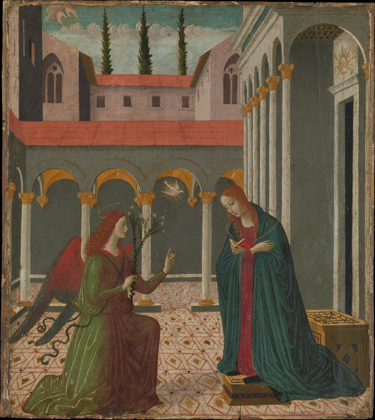

Author: ALESSO DI BENOZZO


In [52]:
sample = train_dataset_clas[223]
s_c = train_dataset_capt[223]
image = sample['image']
image_c = s_c['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
display(image_c.resize((int(0.3*height),int(0.3*width))))
caption = sample['label']
print(f'Author: {id2label[caption]}')

In [53]:
from transformers import AutoImageProcessor

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_processor = AutoImageProcessor.from_pretrained(checkpoint)

inputs = image_processor(image, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model_clas(**inputs).logits

In [57]:
device = 'cpu'
inputs = processor_capt(images = image_c, return_tensors='pt').to(device)
pixel_values = inputs.pixel_values

generated_ids = model_capt.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor_capt.batch_decode(generated_ids,skip_special_tokens=True)[0]
print(generated_caption)

the picture shows the scenes of the chapel of the cathedral.


In [58]:
predicted_label = logits.argmax(-1).item()
model_clas.config.id2label[predicted_label]

'ALESSO DI BENOZZO'